In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from contextlib import closing
import seaborn as sns

DATABASE_PATH = "C:/Users/Pedro/Desktop/M-Pindividual/data/database.db"

# Función para realizar consultas a la base de datos
def query_db(query, params=()):
    with closing(sqlite3.connect(DATABASE_PATH)) as conn:
        df = pd.read_sql_query(query, conn, params=params)
    return df



# Obtención de datos

In [2]:
# Actores
query_actores = """
SELECT c.name
FROM characters c
JOIN movies m ON c.id_movies = m.id
"""
df_actores = query_db(query_actores)

# Directores
query_directores = """
SELECT d.name
FROM directors d
JOIN movies m ON d.id_movies = m.id
"""
df_directores = query_db(query_directores)

# Títulos de películas con mejor puntuación
query_titulos = """
SELECT title
FROM movies
ORDER BY popularity DESC
LIMIT 100
"""
df_titulos = query_db(query_titulos)


# Películas
query_peliculas = """
SELECT title, Anio AS release_year, popularity, budget, revenue, vote_count, vote_average
FROM movies
"""
df_peliculas = query_db(query_peliculas)

query_top_titulos = """
SELECT title, popularity
FROM movies
ORDER BY popularity DESC
LIMIT 10
"""
df_top_titulos = query_db(query_top_titulos)




# Función para generar un gráfico de barras utilizando matplotlib

In [3]:
# def generate_bar_chart(text, title):
#     word_counts = Counter(text.split())
#     word_counts = dict(word_counts.most_common(50))  

#     plt.figure(figsize=(10, 5))
#     plt.bar(word_counts.keys(), word_counts.values())
#     plt.xticks(rotation=90)
#     plt.title(title)
#     plt.show()

# Distribución de películas por año

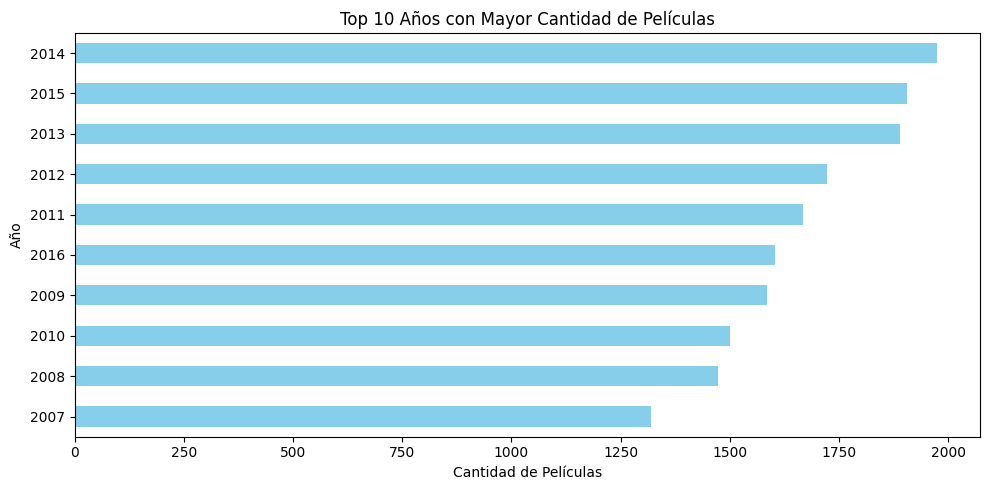

In [4]:

top_10_years = df_peliculas['release_year'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_10_years.sort_values(ascending=True).plot(kind='barh', color='skyblue')  # Horizontal
plt.title('Top 10 Años con Mayor Cantidad de Películas')
plt.xlabel('Cantidad de Películas')
plt.ylabel('Año')
plt.tight_layout()
plt.show()

# Relación entre presupuesto y retorno

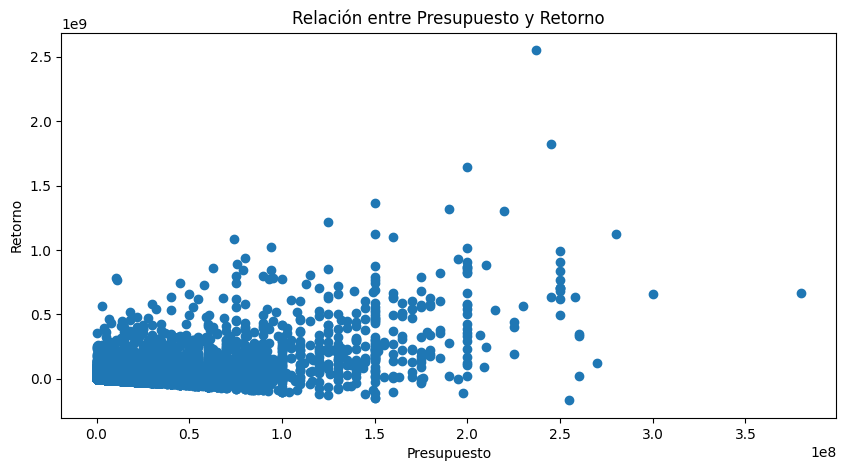

In [5]:


df_peliculas['return'] = df_peliculas['revenue'] - df_peliculas['budget']
plt.figure(figsize=(10, 5))
plt.scatter(df_peliculas['budget'], df_peliculas['return'])
plt.title('Relación entre Presupuesto y Retorno')
plt.xlabel('Presupuesto')
plt.ylabel('Retorno')
plt.show()

# 5 películas con mayor puntuación por año

C:\Users\Pedro\AppData\Local\Temp\ipykernel_12112\798317927.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, 'vote_average'))  # Seleccionar las 5 con mayor puntuación


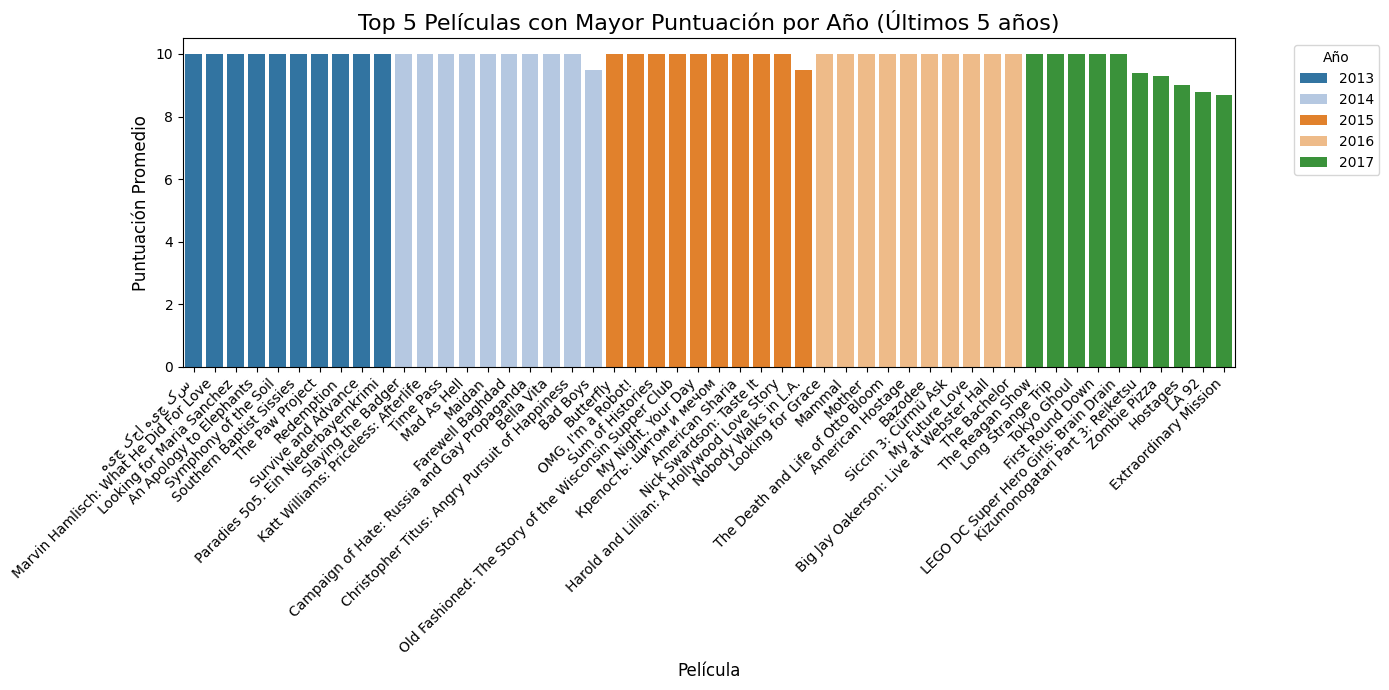

In [6]:
df_peliculas_clean = df_peliculas[(df_peliculas['release_year'] != 0) & 
                                   (df_peliculas['vote_average'] != 0) & 
                                   (df_peliculas['title'].notnull())]

# Filtrar por los últimos 5 años
ultimos_5_anios = df_peliculas_clean['release_year'].max() - 5
df_peliculas_ultimos_10_anios = df_peliculas_clean[df_peliculas_clean['release_year'] > ultimos_5_anios]

# Seleccionar las 5 películas con mayor puntuación por año
top_5_por_anio = (
    df_peliculas_ultimos_10_anios.groupby('release_year')  # Agrupar por el año
    .apply(lambda x: x.nlargest(10, 'vote_average'))  # Seleccionar las 5 con mayor puntuación
    .reset_index(drop=True)
)

# Crear el gráfico
plt.figure(figsize=(14, 7))
sns.barplot(
    data=top_5_por_anio,
    x='title',  # Títulos de las películas
    y='vote_average',  # Puntuación
    hue='release_year',  # Colorear según el año
    dodge=False,  # No separar las barras
    palette='tab20'  # Paleta de colores
)

# Personalizar el gráfico
plt.title('Top 5 Películas con Mayor Puntuación por Año (Últimos 5 años)', fontsize=16)
plt.xlabel('Película', fontsize=12)
plt.ylabel('Puntuación Promedio', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotar etiquetas de los títulos
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Distribución de votos

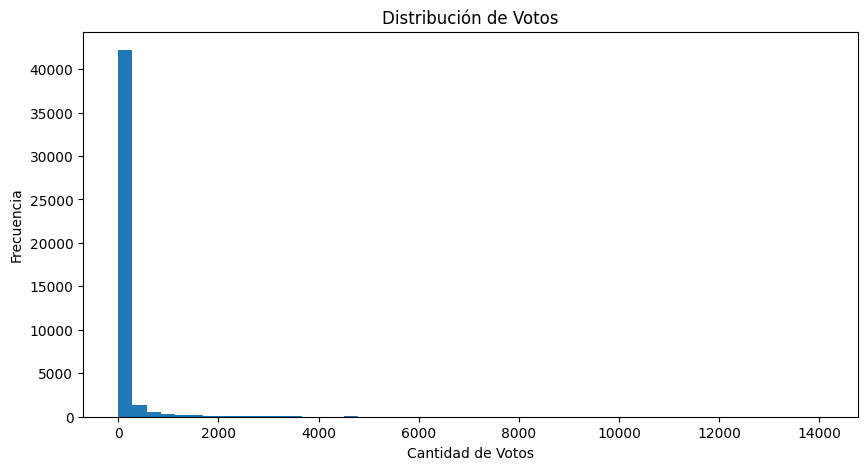

In [7]:

plt.figure(figsize=(10, 5))
df_peliculas['vote_count'].plot(kind='hist', bins=50)
plt.title('Distribución de Votos')
plt.xlabel('Cantidad de Votos')
plt.ylabel('Frecuencia')
plt.show()